In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.special import gamma as gamma_func

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 8)

# Set random seed for reproducibility
np.random.seed(42)

In [2]:
class TransformationMethods:
    """Implementation of transformation methods from Exercise 2"""

    @staticmethod
    def gamma_to_beta_method(a, b, n_samples=10000):
        """
        Exercise 2.1: Generate Beta(a,b) from two independent Gamma distributions
        X1 ~ Gamma(a,1), X2 ~ Gamma(b,1) => R = X1/(X1+X2) ~ Beta(a,b)
        """
        X1 = np.random.gamma(a, 1, n_samples)  # Gamma(a, 1)
        X2 = np.random.gamma(b, 1, n_samples)  # Gamma(b, 1)
        R = X1 / (X1 + X2)  # Beta(a, b)
        S = X1 + X2  # Gamma(a+b, 1) - also generated but not the focus here
        return R, S, X1, X2

    @staticmethod
    def uniform_power_to_beta(a, n_samples=10000):
        """
        Exercise 2.2: Generate Beta(a,1) from U^(1/a) where U ~ U[0,1]
        """
        U = np.random.uniform(0, 1, n_samples)
        X = U ** (1 / a)  # Beta(a, 1)
        return X, U

    @staticmethod
    def johnk_algorithm(a, n_samples=10000):
        """
        Exercise 2.5: Jöhnk's algorithm for generating Gamma(a,1) when a ∈ (0,1)
        This uses the acceptance-rejection method with uniform distributions
        """
        samples = []
        total_attempts = 0
        rejected_yz_sums = []
        accepted_yz_sums = []

        while len(samples) < n_samples:
            # Step (a): Generate two independent U, V ~ U[0,1]
            U = np.random.uniform(0, 1)
            V = np.random.uniform(0, 1)

            # Step (b): Set Y = U^(1/a) and Z = V^(1/(1-a))
            Y = U ** (1 / a)
            Z = V ** (1 / (1 - a))
            yz_sum = Y + Z

            # Step (c): If (Y + Z) ≤ 1, accept
            if yz_sum <= 1:
                # Step (d): Generate independent A ~ U[0,1] and set T = -log(A)
                A = np.random.uniform(0, 1)
                T = -np.log(A)  # T ~ Exp(1)

                # Step (e): Return T*Y/(Y+Z) which is Gamma(a,1)
                sample = T * Y / yz_sum
                samples.append(sample)
                accepted_yz_sums.append(yz_sum)
            else:
                rejected_yz_sums.append(yz_sum)

            total_attempts += 1

        acceptance_rate = n_samples / total_attempts
        return np.array(samples), acceptance_rate, accepted_yz_sums, rejected_yz_sums

    @staticmethod
    def beta_general_method(a, b, n_samples=10000):
        """
        Exercise 2.6: Generate Beta(a,b) for any a > 0, b > 0
        Uses the fact that Gamma variables can be constructed from the Jöhnk algorithm
        for fractional parts and standard methods for integer parts
        """
        samples = []

        for _ in range(n_samples):
            # For simplicity, we'll use numpy's gamma for this demonstration
            # In practice, for a < 1, you would use Jöhnk's algorithm
            X1 = np.random.gamma(a, 1)
            X2 = np.random.gamma(b, 1)
            sample = X1 / (X1 + X2)
            samples.append(sample)

        return np.array(samples)

EXERCISE 2.1: Beta from Gamma Transformation


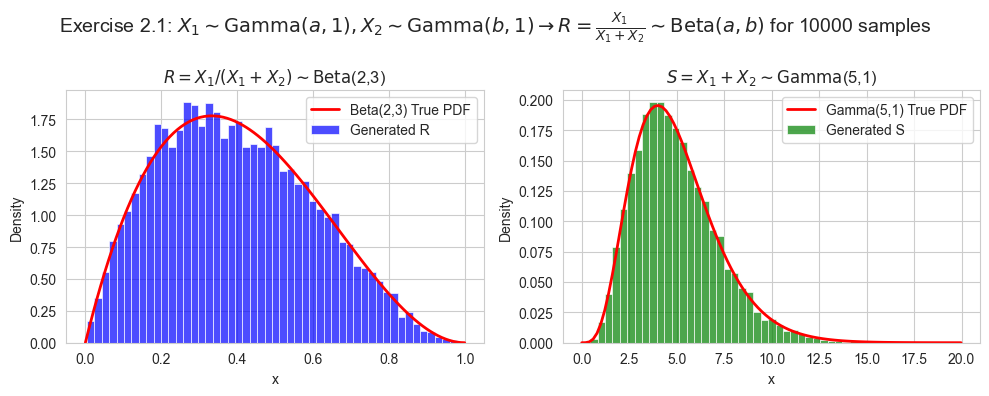

In [18]:
# Create an instance of our methods class
tm = TransformationMethods()

# ================================================================================
# EXERCISE 2.1: Gamma to Beta Transformation
# ================================================================================
print("=" * 80)
print("EXERCISE 2.1: Beta from Gamma Transformation")
print("=" * 80)

n_samples = 10000

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle(
    r"Exercise 2.1: $X_1 \sim \text{Gamma}(a,1), X_2 \sim \text{Gamma}(b,1) \rightarrow R = \frac{X_1}{X_1+X_2} \sim \text{Beta}(a,b)$"
    + f" for {n_samples} samples",
    fontsize=14,
)

a1, b1 = 2, 3
R, S, X1, X2 = tm.gamma_to_beta_method(a1, b1, n_samples=n_samples)

# Plot 1: Beta distribution R = X1/(X1+X2)
ax = axes[0]
sns.histplot(
    R, bins=50, stat="density", alpha=0.7, ax=ax, color="blue", label="Generated R"
)
x = np.linspace(0, 1, 100)
ax.plot(x, stats.beta.pdf(x, a1, b1), "r-", lw=2, label=f"Beta({a1},{b1}) True PDF")
ax.set_title(r"$R = X_1/(X_1+X_2) \sim \text{Beta}$(" + f"{a1},{b1})")
ax.set_xlabel("x")
ax.set_ylabel("Density")
ax.legend()

# Plot 2: Gamma sum S = X1 + X2
ax = axes[1]
sns.histplot(
    S, bins=50, stat="density", alpha=0.7, ax=ax, color="green", label="Generated S"
)
x = np.linspace(0, max(S), 100)
ax.plot(
    x,
    stats.gamma.pdf(x, a1 + b1, scale=1),
    "r-",
    lw=2,
    label=f"Gamma({a1 + b1},1) True PDF",
)
ax.set_title(r"$S = X_1+X_2 \sim \text{Gamma}$(" + f"{a1 + b1},1)")
ax.set_xlabel("x")
ax.set_ylabel("Density")
ax.legend()

plt.tight_layout()
plt.savefig("exercise2_1.pdf", dpi=600, bbox_inches="tight")
plt.show()

In [12]:
# # Statistical tests for Exercise 2.1
# ks_stat_beta, p_value_beta = stats.kstest(R, lambda x: stats.beta.cdf(x, a1, b1))
# ks_stat_gamma, p_value_gamma = stats.kstest(S, lambda x: stats.gamma.cdf(x, a1 + b1))
# print("\nKolmogorov-Smirnov Tests:")
# print(f"  Beta({a1},{b1}): KS = {ks_stat_beta:.4f}, p-value = {p_value_beta:.4f}")
# print(f"  Gamma({a1 + b1},1): KS = {ks_stat_gamma:.4f}, p-value = {p_value_gamma:.4f}")



EXERCISE 2.2: Beta from Uniform Power Transformation


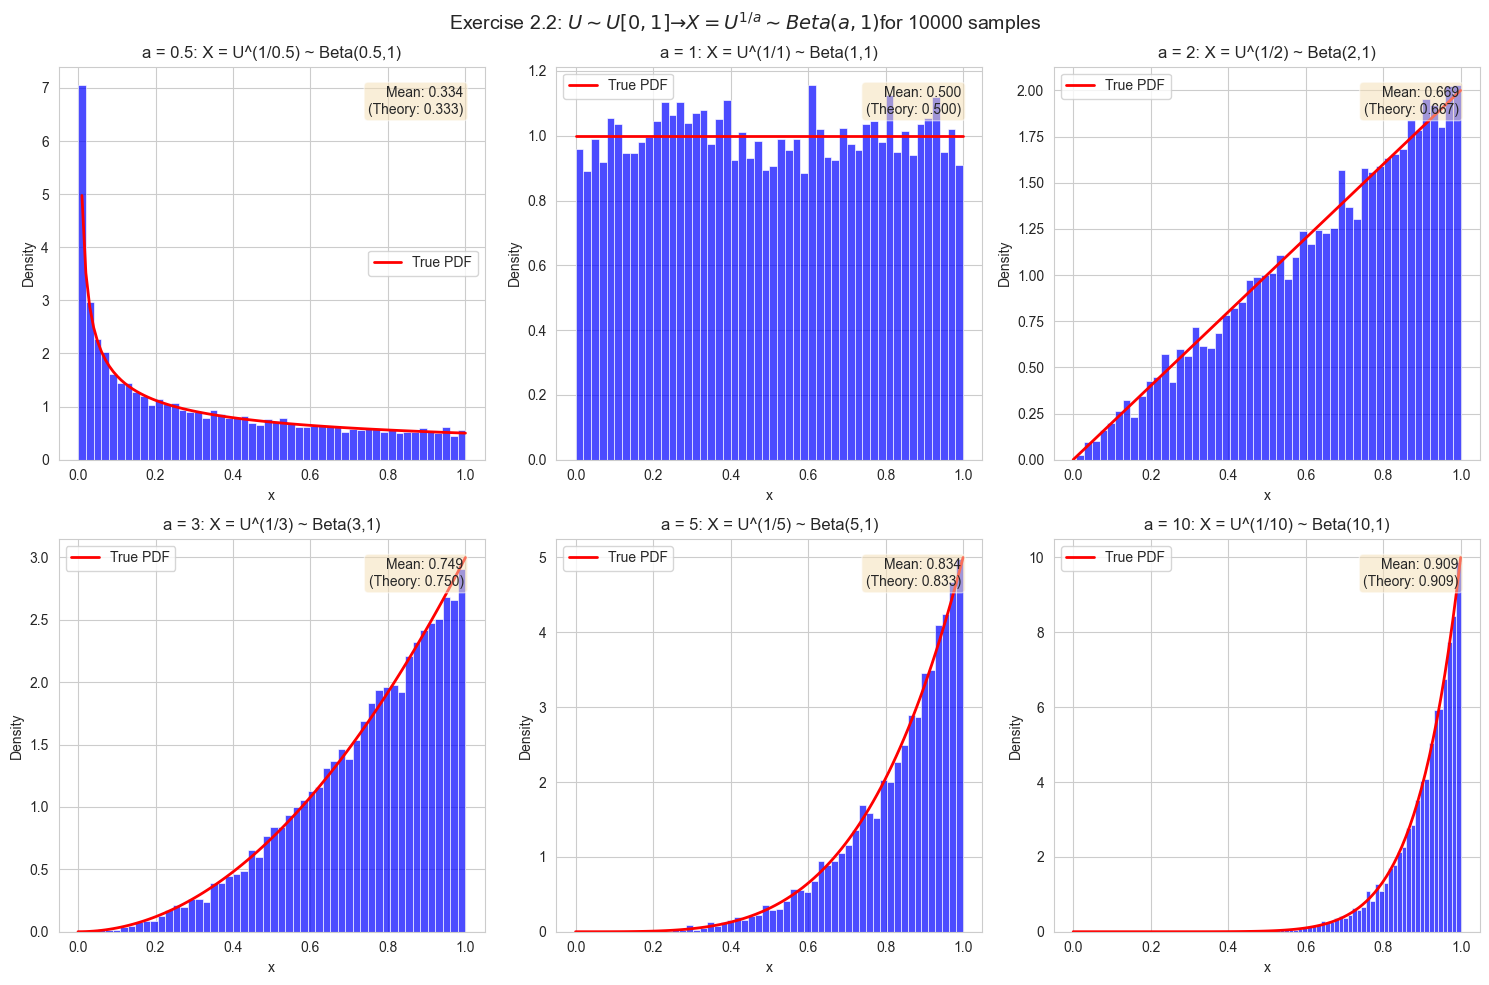

In [21]:
# ================================================================================
# EXERCISE 2.2: Uniform Power to Beta
# ================================================================================
print("\n" + "=" * 80)
print("EXERCISE 2.2: Beta from Uniform Power Transformation")
print("=" * 80)

n_samples = 10000

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle(
    r"Exercise 2.2: $U \sim U[0,1] → X = U^{1/a} \sim Beta(a,1)$"
    + f"for {n_samples} samples",
    fontsize=14,
)

# Test different values of a
a_values = [0.5, 1, 2, 3, 5, 10]

for idx, a in enumerate(a_values):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]

    X, U = tm.uniform_power_to_beta(a, n_samples=n_samples)

    # Plot histogram with theoretical PDF
    sns.histplot(X, bins=50, stat="density", alpha=0.7, ax=ax, color="blue")
    x = np.linspace(0, 1, 100)
    ax.plot(x, stats.beta.pdf(x, a, 1), "r-", lw=2, label="True PDF")
    ax.set_title(f"a = {a}: X = U^(1/{a}) ~ Beta({a},1)")
    ax.set_xlabel("x")
    ax.set_ylabel("Density")
    ax.legend()

    # Add text with mean and variance
    theoretical_mean = a / (a + 1)
    empirical_mean = np.mean(X)
    ax.text(
        0.95,
        0.95,
        f"Mean: {empirical_mean:.3f}\n(Theory: {theoretical_mean:.3f})",
        transform=ax.transAxes,
        ha="right",
        va="top",
        bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.5),
    )

plt.tight_layout()
plt.savefig("exercise2_2.pdf", dpi=600, bbox_inches="tight")
plt.show()


EXERCISE 2.5: Jöhnk's Algorithm for Gamma(a,1) with a ∈ (0,1)


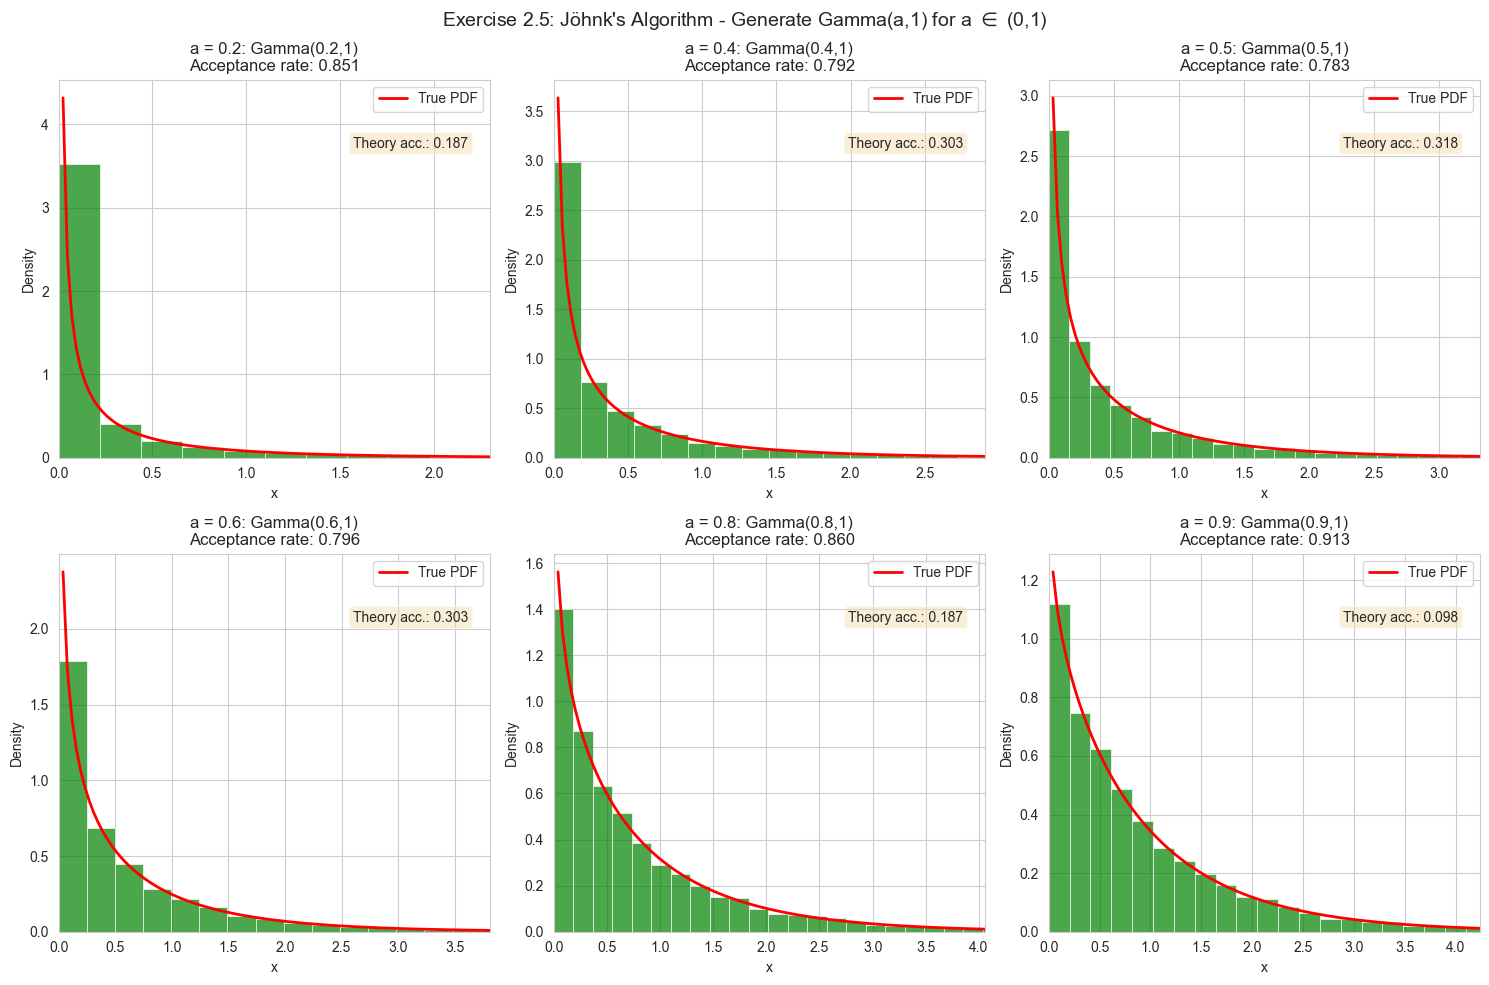

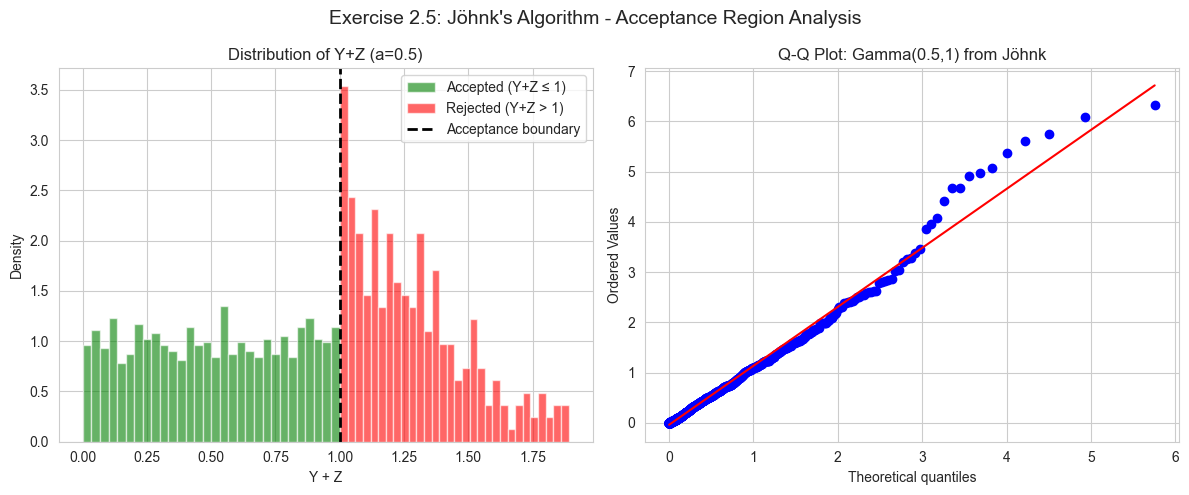

In [22]:
# ================================================================================
# EXERCISE 2.5: Jöhnk's Algorithm
# ================================================================================
print("\n" + "=" * 80)
print("EXERCISE 2.5: Jöhnk's Algorithm for Gamma(a,1) with a ∈ (0,1)")
print("=" * 80)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle(
    r"Exercise 2.5: Jöhnk's Algorithm - Generate Gamma(a,1) for a $\in$ (0,1)",
    fontsize=14,
)

# Test different values of a
a_values_johnk = [0.2, 0.4, 0.5, 0.6, 0.8, 0.9]

for idx, a in enumerate(a_values_johnk):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]

    gamma_samples, acceptance_rate, accepted_yz, rejected_yz = tm.johnk_algorithm(
        a, n_samples=10000
    )

    # Plot histogram with theoretical PDF
    sns.histplot(
        gamma_samples, bins=50, stat="density", alpha=0.7, ax=ax, color="green"
    )
    x = np.linspace(0, np.percentile(gamma_samples, 99), 100)
    ax.plot(x, stats.gamma.pdf(x, a, scale=1), "r-", lw=2, label="True PDF")
    ax.set_title(f"a = {a}: Gamma({a},1)\nAcceptance rate: {acceptance_rate:.3f}")
    ax.set_xlabel("x")
    ax.set_ylabel("Density")
    ax.set_xlim(0, np.percentile(gamma_samples, 99))
    ax.legend()

    # Add theoretical acceptance rate
    theoretical_accept = 1 / (gamma_func(a) * gamma_func(1 - a))
    ax.text(
        0.95,
        0.85,
        f"Theory acc.: {theoretical_accept:.3f}",
        transform=ax.transAxes,
        ha="right",
        va="top",
        bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.5),
    )

plt.tight_layout()
plt.savefig("exercise2_5.pdf", dpi=600, bbox_inches="tight")
plt.show()

# Additional plot showing the acceptance region
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle(
    "Exercise 2.5: Jöhnk's Algorithm - Acceptance Region Analysis", fontsize=14
)

a = 0.5
gamma_samples, acceptance_rate, accepted_yz, rejected_yz = tm.johnk_algorithm(
    a, n_samples=1000
)

# Plot 1: Y+Z distribution for accepted vs rejected
ax = axes[0]
ax.hist(
    accepted_yz,
    bins=30,
    alpha=0.6,
    color="green",
    label="Accepted (Y+Z ≤ 1)",
    density=True,
)
ax.hist(
    rejected_yz[: len(accepted_yz)],
    bins=30,
    alpha=0.6,
    color="red",
    label="Rejected (Y+Z > 1)",
    density=True,
)
ax.axvline(x=1, color="black", linestyle="--", lw=2, label="Acceptance boundary")
ax.set_xlabel("Y + Z")
ax.set_ylabel("Density")
ax.set_title(f"Distribution of Y+Z (a={a})")
ax.legend()

# Plot 2: Q-Q plot for Gamma validation
ax = axes[1]
stats.probplot(gamma_samples, dist=stats.gamma(a), plot=ax)
ax.set_title(f"Q-Q Plot: Gamma({a},1) from Jöhnk")

plt.tight_layout()
plt.show()

In [ ]:
# ================================================================================
# EXERCISE 2.6: General Beta Generation
# ================================================================================
print("\n" + "=" * 80)
print("EXERCISE 2.6: General Beta(a,b) Generation")
print("=" * 80)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Exercise 2.6: Beta(a,b) for Various Parameters", fontsize=14)

# Different parameter combinations
params = [
    (0.5, 0.5),  # U-shaped
    (1, 1),  # Uniform
    (2, 2),  # Symmetric bell
    (2, 5),  # Skewed left
    (5, 2),  # Skewed right
    (0.5, 2),  # J-shaped
]

for idx, (a, b) in enumerate(params):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]

    beta_samples = tm.beta_general_method(a, b, n_samples=5000)

    # Plot histogram with theoretical PDF
    sns.histplot(
        beta_samples, bins=50, stat="density", alpha=0.7, ax=ax, color="purple"
    )
    x = np.linspace(0.001, 0.999, 100)
    ax.plot(x, stats.beta.pdf(x, a, b), "r-", lw=2, label="True PDF")
    ax.set_title(f"Beta({a},{b})")
    ax.set_xlabel("x")
    ax.set_ylabel("Density")
    ax.set_ylim(0, max(stats.beta.pdf(x, a, b)) * 1.2)
    ax.legend()

    # Add moments
    mean = a / (a + b)
    var = (a * b) / ((a + b) ** 2 * (a + b + 1))
    mode = (a - 1) / (a + b - 2) if a > 1 and b > 1 else np.nan

    text = f"Mean: {np.mean(beta_samples):.3f} ({mean:.3f})\n"
    text += f"Var: {np.var(beta_samples):.3f} ({var:.3f})"
    if not np.isnan(mode):
        text += f"\nMode: {mode:.3f}"

    ax.text(
        0.95,
        0.95,
        text,
        transform=ax.transAxes,
        ha="right",
        va="top",
        bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.5),
        fontsize=9,
    )

plt.tight_layout()
plt.show()

# ================================================================================
# SUMMARY STATISTICS
# ================================================================================
print("\n" + "=" * 80)
print("SUMMARY: Statistical Validation of All Methods")
print("=" * 80)

print("\nMoment Comparison (Empirical vs Theoretical):")
print("-" * 60)

# Exercise 2.1 validation
a1, b1 = 2, 3
R, S, _, _ = tm.gamma_to_beta_method(a1, b1, n_samples=10000)
beta_mean = a1 / (a1 + b1)
beta_var = (a1 * b1) / ((a1 + b1) ** 2 * (a1 + b1 + 1))
print(f"\nExercise 2.1 - Beta({a1},{b1}):")
print(f"  Mean: Empirical = {np.mean(R):.4f}, Theoretical = {beta_mean:.4f}")
print(f"  Variance: Empirical = {np.var(R):.4f}, Theoretical = {beta_var:.4f}")

# Exercise 2.2 validation
a2 = 3
X, _ = tm.uniform_power_to_beta(a2, n_samples=10000)
beta_mean = a2 / (a2 + 1)
beta_var = a2 / ((a2 + 1) ** 2 * (a2 + 2))
print(f"\nExercise 2.2 - Beta({a2},1) from U^(1/{a2}):")
print(f"  Mean: Empirical = {np.mean(X):.4f}, Theoretical = {beta_mean:.4f}")
print(f"  Variance: Empirical = {np.var(X):.4f}, Theoretical = {beta_var:.4f}")

# Exercise 2.5 validation
a5 = 0.5
gamma_samples, accept_rate, _, _ = tm.johnk_algorithm(a5, n_samples=5000)
print(f"\nExercise 2.5 - Gamma({a5},1) from Jöhnk:")
print(f"  Mean: Empirical = {np.mean(gamma_samples):.4f}, Theoretical = {a5:.4f}")
print(f"  Variance: Empirical = {np.var(gamma_samples):.4f}, Theoretical = {a5:.4f}")
print(f"  Acceptance Rate: {accept_rate:.4f}")

print("\n" + "=" * 80)